### Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier ,RandomForestClassifier ,GradientBoostingClassifier
#import xgboost
#from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import Ridge,Lasso
from sklearn.metrics import roc_auc_score ,mean_squared_error,accuracy_score,classification_report,roc_curve,confusion_matrix,precision_score, f1_score, recall_score
import warnings
warnings.filterwarnings('ignore')
from scipy.stats.mstats import winsorize
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA 
from sklearn.model_selection import KFold
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVR
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE, RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

In [2]:
# load data set
from google.colab import  files
uploaded = files.upload()

Saving test.csv to test.csv
Saving train.csv to train.csv


### Load and Prepare dataset
#### Load the dataframe using pandas.
#### Seperate the features and target.

In [3]:
# Load the dataframe
insure_df=pd.read_csv('train.csv')

# Seperate the features and target
target = insure_df['Claim']
predictors = insure_df.drop(['Claim'],axis=1)
df_test=pd.read_csv('test.csv')
predictors.head()

,ID,Agency,Agency Type,Distribution Channel,Product Name,Duration,Destination,Net Sales,Commision (in value),Age
0,2010,EPX,Travel Agency,Online,Cancellation Plan,61,PHILIPPINES,12.0,0.00,41
1,4245,EPX,Travel Agency,Online,Cancellation Plan,4,MALAYSIA,17.0,0.00,35
2,9251,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,26,THAILAND,19.8,11.88,47
3,4754,EPX,Travel Agency,Online,2 way Comprehensive Plan,15,HONG KONG,27.0,0.00,48
4,8840,EPX,Travel Agency,Online,2 way Comprehensive Plan,15,MALAYSIA,37.0,0.00,36


### Check Numeric and Categorical Features
#### The given dataset contains both continuous and categorical features.
#### Wrote two functions - one which return column names of only the continuous variables and the other which return all the categorical features in the dataset.

In [4]:
# Function to identify numeric features
def numeric_features(dataset):
    numeric_col = dataset.select_dtypes(include=['number']).columns
    return numeric_col

numeric_columns = numeric_features(predictors)
print("Numeric Features:")
print(numeric_columns)
print("===="*20)

# Function to identify categorical features
def categorical_features(dataset):
    categorical_col = dataset.select_dtypes(exclude=['number']).columns
    return categorical_col

categorical_columns = categorical_features(predictors)
print("Categorical Features:")
print(categorical_columns)

Numeric Features:
Index(['ID', 'Duration', 'Net Sales', 'Commision (in value)', 'Age'], dtype='object')
Categorical Features:
Index(['Agency', 'Agency Type', 'Distribution Channel', 'Product Name',
       'Destination'],
      dtype='object')


### Check Missing Data
#### Wrote a function that calculates the total missing values and the percentage of missing values in every feature of the dataset
#### The above function returns a dataframe consisting of the feature names as index and two columns having the count and percentage of missing values in that feature.

In [5]:
# Function to identify the number of missing values in every feature of Train dataset
def missing_datas(dataset):
    total = dataset.isnull().sum().sort_values(ascending=False)
    percent = (dataset.isnull().sum()/dataset.isnull().count()).sort_values(ascending=False)
    missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    return missing_data
    
missing_data = missing_datas(predictors)
print(missing_data)

                      Total  Percent
Age                       0      0.0
Commision (in value)      0      0.0
Net Sales                 0      0.0
Destination               0      0.0
Duration                  0      0.0
Product Name              0      0.0
Distribution Channel      0      0.0
Agency Type               0      0.0
Agency                    0      0.0
ID                        0      0.0


In [6]:
# Function to identify the number of missing values in every feature of Test dataset
missing_data = missing_datas(df_test)
print(missing_data)

                      Total  Percent
Age                       0      0.0
Commision (in value)      0      0.0
Net Sales                 0      0.0
Destination               0      0.0
Duration                  0      0.0
Product Name              0      0.0
Distribution Channel      0      0.0
Agency Type               0      0.0
Agency                    0      0.0
ID                        0      0.0


### Dropping / Imputing Missing Values
#### Dropping ID column

In [7]:
predictors.drop('ID', axis=1, inplace= True)
#df_test.drop('ID', axis=1, inplace= True)

In [8]:
predictors.head()

,Agency,Agency Type,Distribution Channel,Product Name,Duration,Destination,Net Sales,Commision (in value),Age
0,EPX,Travel Agency,Online,Cancellation Plan,61,PHILIPPINES,12.0,0.00,41
1,EPX,Travel Agency,Online,Cancellation Plan,4,MALAYSIA,17.0,0.00,35
2,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,26,THAILAND,19.8,11.88,47
3,EPX,Travel Agency,Online,2 way Comprehensive Plan,15,HONG KONG,27.0,0.00,48
4,EPX,Travel Agency,Online,2 way Comprehensive Plan,15,MALAYSIA,37.0,0.00,36


### Check for Class Imbalance
#### Check the class distribution of all the classes in the target. If an imbalance exists, we will deal with it by applying SMOTE in the later stages.

In [9]:
def class_imbalance(target):
    class_values = (target.value_counts()/target.value_counts().sum())*100
    return class_values

class_imbalance(target)

0    83.330147
1    16.669853
Name: Claim, dtype: float64

#### The distribution 83:16 is a clear indication of imbalance in the classes.

### Univariate analysis of Categorical columns
#### Wrote a function that plots the frequency of the values of all the categorical variables

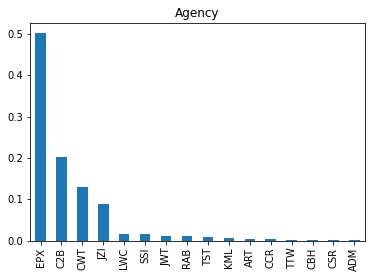

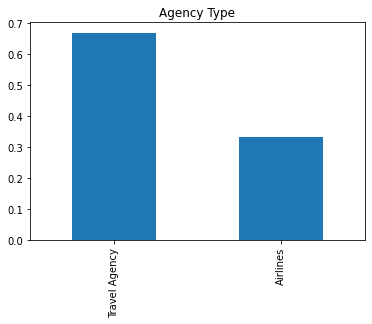

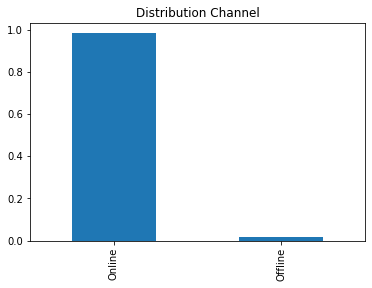

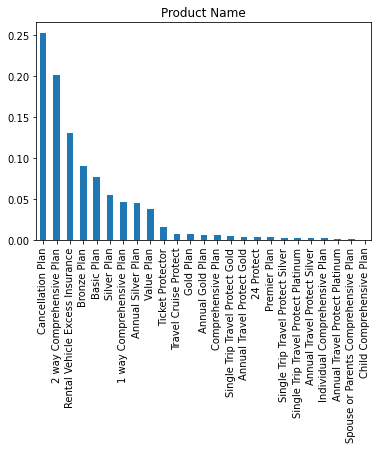

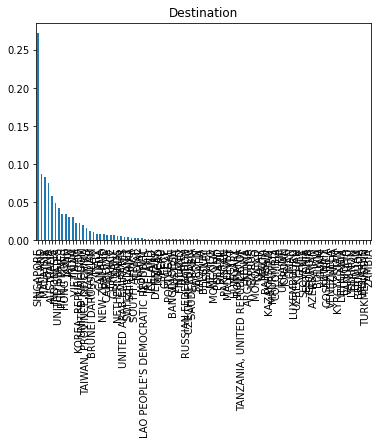

In [10]:
# Function to perform univariate analysis of categorical columns
def plot_categorical_columns(dataframe):
    categorical_columns = categorical_features(dataframe)
    dataframe = dataframe[categorical_columns]
    for i in dataframe:
        plt.title(i)
        dataframe[i].value_counts(normalize=True).plot(kind='bar')
        plt.show()

plot = plot_categorical_columns(predictors)

### Agency
#### Insight : More people are taking claim from "EPX"

### Agency Type 
#### Insight : People are more interested in Travel Agency.

### Distribution Channel
#### Insight : Most famous Distribution Channel is "Online".

### Product Name
#### Insight : People are more interested in "Cancellation Plan"
#### Recommendation : In order to target more customers, try to provide good packages for other products apart from "Cancellation Plan"

### Destination
#### Insight : People are more interested in "Singapore"(more popular destinations are asian countries)
#### Recommendation : more popular destinations are asian countries. Provide better packages for these countries.

### Univariate analysis of Continuous columns
#### Construct two functions, one that plots a histogram of all the continuous features and other that plots a boxplot of the same. Histograms are great for plotting the distribution of the data and boxplots are the best choice for visualizing outliers.

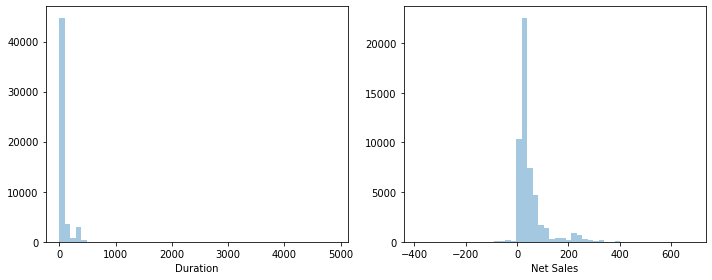

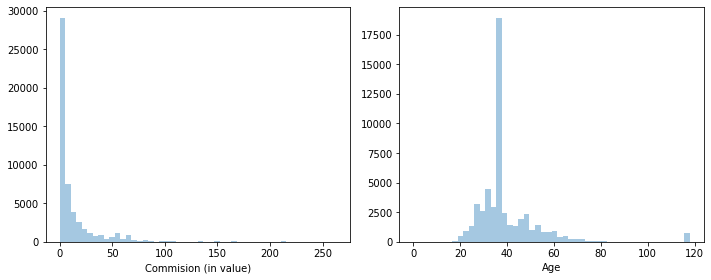

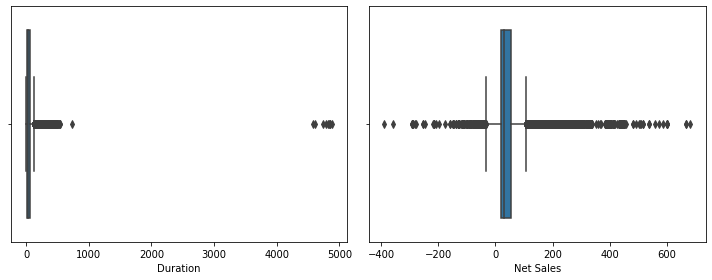

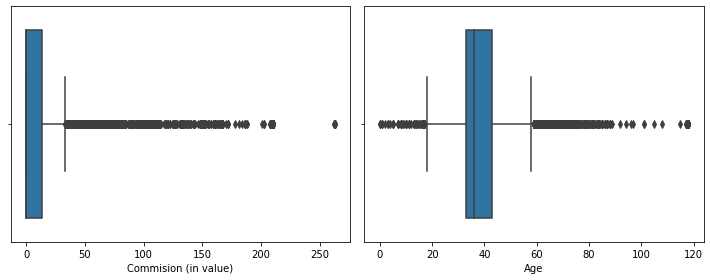

In [11]:
# Function to plot histograms of Continuous columns
def plot_continuous_columns(dataframe):
    numeric_columns = numeric_features(dataframe)
    dataframe = dataframe[numeric_columns]
    
    for i in range(0,len(numeric_columns),2):
        if len(numeric_columns) > i+1:
            plt.figure(figsize=(10,4))
            plt.subplot(121)
            sns.distplot(dataframe[numeric_columns[i]], kde=False)
            plt.subplot(122)            
            sns.distplot(dataframe[numeric_columns[i+1]], kde=False)
            plt.tight_layout()
            plt.show()

        else:
            sns.distplot(dataframe[numeric_columns[i]], kde=False)

# Function to plot boxplots of Continuous columns
def plot_box_plots(dataframe):
    numeric_columns = numeric_features(dataframe)
    dataframe = dataframe[numeric_columns]
    
    for i in range(0,len(numeric_columns),2):
        if len(numeric_columns) > i+1:
            plt.figure(figsize=(10,4))
            plt.subplot(121)
            sns.boxplot(dataframe[numeric_columns[i]])
            plt.subplot(122)            
            sns.boxplot(dataframe[numeric_columns[i+1]])
            plt.tight_layout()
            plt.show()

        else:
            sns.boxplot(dataframe[numeric_columns[i]])

plot_continuous_columns(predictors)            
plot_box_plots(predictors)

## distplot

### Duration
#### Insight : Duration cannot be negative. So negative records needs to be managed.(need to check unit of measure for duration)

### Age 
#### Insight : Maximum age group of travellers is 30 to 45.(There are some records of age 118 years. Need to impute these values in order to handle outliers)
#### Recommendation : Our majority of customers are within age group of 30-45 and we need to focus on the customers within this age group.

### Commision
#### Insight :

### Net Sales
#### Insight :

## Boxplot

### Duration
#### Insight : Insight: Duration cannot be negative. So negative records needs to be managed.(need to check unit of measure for duration)

### Age 
#### Insight : Maximum age group of travellers is 30 to 45.(There are some records of age 118 years. Need to impute these values in order to handle outliers)
#### Recommendation : Our majority of customers are within age group of 30-45 and we need to focus on the customers within this age group.

### Commision
#### Nothing to do with Commision

### Net Sales
#### Assumpation : Negative values will be loss to company and positive values will be treated as profit to company.

### Bivariate Analysis - Categorical Columns

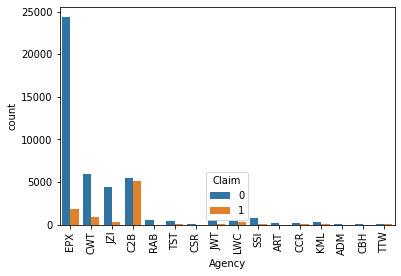

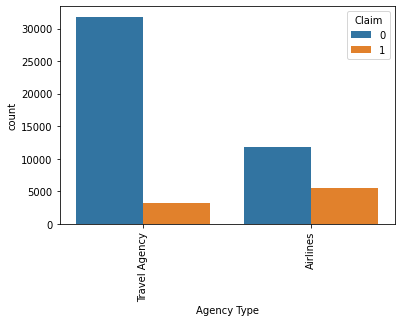

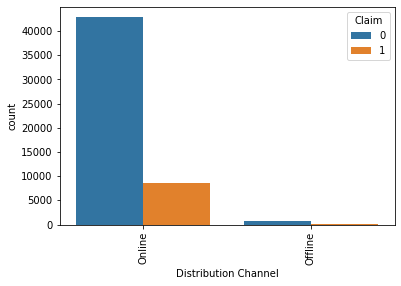

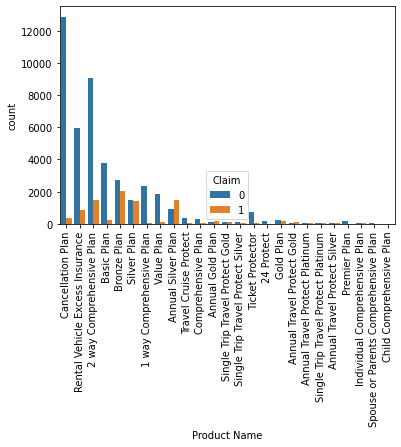

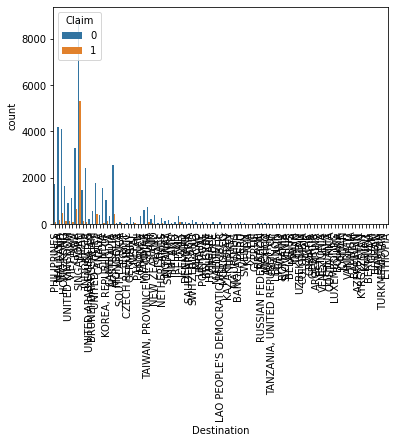

In [12]:
def bivariate_analysis_categorical(dataframe,target):
    cols = list(dataframe)
    for col in cols:
        if col in dataframe.select_dtypes(exclude=np.number).columns:
            sns.countplot(x=dataframe[col],hue=target,data=dataframe)
            plt.xticks(rotation='vertical')
            plt.show()

bivariate_analysis_categorical(predictors,target)

### Detect outliers in the continuous columns
- Wrote a function that will output the number of outliers in every numeric feature based on 1.5*IQR method

In [13]:
# Function to detect outliers in every feature
def detect_outliers(dataframe):
    cols = list(dataframe)
    
    for column in cols:
        if column in dataframe.select_dtypes(include=np.number).columns:
            q1 = dataframe[column].quantile(0.25)
            q3 = dataframe[column].quantile(0.75)
            iqr = q3 - q1
            fence_low = q1 - (1.5*iqr)
            fence_high = q3 + (1.5*iqr)

            print(column + ' ---------', dataframe.loc[(dataframe[column] < fence_low) | (dataframe[column] > fence_high)].shape[0])

detect_outliers(predictors)

Duration --------- 5484
Net Sales --------- 5335
Commision (in value) --------- 6394
Age --------- 3675


In [ ]:
# #for value in colname:
# q1 = predictors['Duration'].quantile(0.25) #first quartile value
# q3 = predictors['Duration'].quantile(0.75) # third quartile value
# iqr = q3-q1 #Interquartile range
# low  = q1-1.5*iqr #acceptable range
# high = q3+1.5*iqr #acceptable range
# print(low)
# print(high)

-60.5
127.5


In [14]:
# Function to detect outliers in every feature
def handle_outliers(dataframe):
    cols = list(dataframe)
    
    for column in cols:
        if column in dataframe.select_dtypes(include=np.number).columns:
            q1 = dataframe[column].quantile(0.25)
            q3 = dataframe[column].quantile(0.75)
            iqr = q3 - q1
            low = q1 - (1.5*iqr)
            high = q3 + (1.5*iqr)
            df_include = dataframe.loc[(dataframe[column]>= low) & (dataframe[column] <= high)] # meeting the acceptable range
            df_exclude = dataframe.loc[(dataframe[column] < low) | (dataframe[column] > high)] #not meeting the acceptable range
#finding the mean of the acceptable range
            mean=int(df_include[column].mean()) 
#imputing outlier values with mean value
            df_exclude[column]=mean
#getting back the original shape of df
#concatenating both dfs to get the original shape
            df_exclude_rev=pd.concat([df_include,df_exclude]) 
            df_exclude_rev.shape           


handle_outliers(predictors)

In [ ]:
# df_include_Duration = predictors.loc[(predictors['Duration']>= low) & \
#                                 (predictors['Duration'] <= high)] # meeting the acceptable range
# df_exclude_Duration = predictors.loc[(predictors['Duration'] < low) | \
#                                (predictors['Duration'] > high)] #not meeting the acceptable range
# df_include_Age = predictors.loc[(predictors['Age']>= low) & \
#                                 (predictors['Age'] <= high)] # meeting the acceptable range
# df_exclude_Age = predictors.loc[(predictors['Age'] < low) | \
#                                (predictors['Age'] > high)] #not meeting the acceptable range

In [ ]:
# def remove_outliers(col):
#     sorted(col)
#     q1, q3 = col.quantile([0.25,0.75])
#     iqr = q3 - q1
#     l_range = q1 - (1.5*iqr)
#     u_range = q3 + (1.5*iqr)
#     col = np.where(col > u_range,mean)
#     #col = np.where(col < l_range,mean)
#     return col


# predictors['Duration'] = mean(predictors['Duration'])
# predictors['Net Sales'] = mean(predictors['Net Sales'])
# predictors['Commision (in value)'] = mean(predictors['Commision (in value)'])
# predictors['Age'] = mean(predictors['Age'])

TypeError: ignored

In [15]:
predictors.skew()

Duration                15.352524
Net Sales                2.811837
Commision (in value)     3.535694
Age                      2.947891
dtype: float64

In [16]:
predictors.describe()

,Duration,Net Sales,Commision (in value),Age
count,52310.000000,52310.000000,52310.000000,52310.000000
mean,58.256108,48.554673,12.219963,39.555725
std,109.138708,60.198589,22.847645,13.762473
min,-2.000000,-389.000000,0.000000,0.000000
25%,10.000000,19.800000,0.000000,33.000000
50%,24.000000,29.500000,0.000000,36.000000
75%,57.000000,55.000000,13.380000,43.000000
max,4881.000000,682.000000,262.760000,118.000000


### Find Correlation between Features
#### A correlation heatmap uses colored cells, typically in a monochromatic scale, to show a 2D correlation matrix (table) between two discrete dimensions or event types. The color value of the cells is proportional to the number of measurements that match the dimensional values.
- Wrote a function that will plot a heatmap using seaborn to depict the pearson correlation of all the numeric features.

Highly Correlated Variables


Series([], dtype: float64)

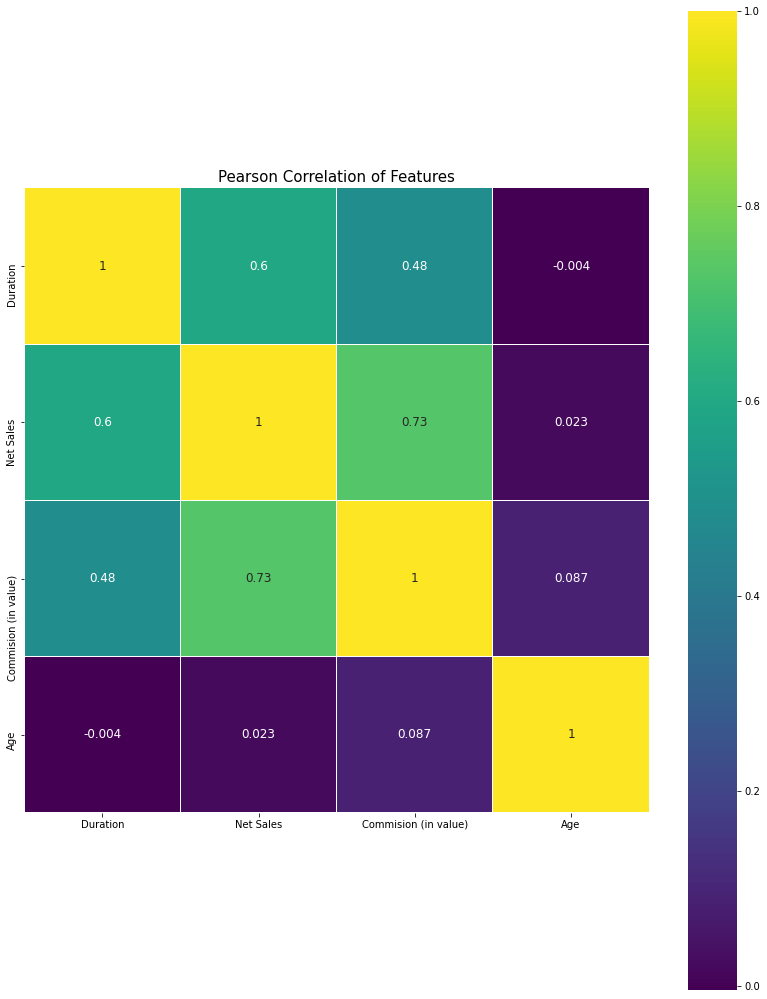

In [17]:
#correlation heatmap of dataset
def correlation_heatmap(df):
    _ , ax = plt.subplots(figsize =(14, 20))
    colormap = sns.diverging_palette(220, 10, as_cmap = True)
    
    _ = sns.heatmap(
        df.corr(), 
        cmap = 'viridis',
        square=True, 
        cbar_kws={'shrink':.9 }, 
        ax=ax,
        annot=True, 
        linewidths=0.1,vmax=1.0, linecolor='white',
        annot_kws={'fontsize':12 }
    )
    
    plt.title('Pearson Correlation of Features', y=1.05, size=15)
    
    correlation = df.corr().unstack().sort_values(kind='quicksort')
    print('Highly Correlated Variables')
    return correlation[((correlation>=0.75) | (correlation<=-0.75)) & (correlation!=1)]

correlation_heatmap(predictors)

### Encoding of Categorical Columns
#### Since our machine learning algorithm can only read numerical values, it is essential to encode categorical features into numerical values.
- wrote a function to encode the categorical column so as to convert them to numeric.

In [18]:
# to encode the categorical column so as to convert them to numeric.
    
def encode_category(df, enc, col, method):
    """Encodes the categorical columns of the dataframe.
    
    This function accepts a dataframe and columns to be encoded along with the method to be used for encoding.
        
    Keyword arguments:
    df -- pandas dataframe for which we want to encode the columns -- this dataframe would be transformed
    enc -- the encoder - fitted on the train data
    col -- list of columns that is to be encoded
    method -- method to be used while encoding
    
    Returns:
    df1 -- the encoded dataframe
    """
    if method == 'label':
        df[col] = enc.transform(df[col].astype(str))
        
    elif method == 'onehot':
        tempdf = enc.transform(df[[col]]).toarray()
        newdf = pd.DataFrame(tempdf, columns = np.array(ohe.categories_).ravel())
        df = pd.concat([df, newdf], axis=1)
        df.drop(columns=[col], inplace = True)
    
    return df

In [19]:
columnsToEncode = list(predictors.select_dtypes(include=['category','object']))
le = LabelEncoder()
for cols in columnsToEncode:
    lb = LabelEncoder()
    lb.fit(predictors[cols])
    predictors = encode_category(predictors, lb, cols, 'label')

In [20]:
predictors.dtypes

Agency                    int64
Agency Type               int64
Distribution Channel      int64
Product Name              int64
Duration                  int64
Destination               int64
Net Sales               float64
Commision (in value)    float64
Age                       int64
dtype: object

In [21]:
# scaled the data
from sklearn.preprocessing import StandardScaler

predictors= predictors # feature data set
target=target

X=  StandardScaler().fit_transform(predictors)

In [22]:
from sklearn.feature_selection import SelectKBest, f_classif
 
#Remove negatives from data post label encoding
 
X = predictors.iloc[:,0:]  #independent columns
y = insure_df.iloc[:,-1]
#y = predictors.iloc[:,-1]    #target column i.e price range
#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(f_classif, k=9) #score_func=chi2,
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(9,'Score'))  #print 10 best features


                  Specs        Score
0                Agency  7013.082409
6             Net Sales  6254.299517
1           Agency Type  4705.984951
7  Commision (in value)  3751.477051
4              Duration  2215.614294
5           Destination  1051.765815
8                   Age   190.430736
2  Distribution Channel     9.241340
3          Product Name     2.712142


In [ ]:
#predictors.drop(['Distribution Channel','Product Name'],axis=1,inplace=True)

In [23]:
predictors.head()

,Agency,Agency Type,Distribution Channel,Product Name,Duration,Destination,Net Sales,Commision (in value),Age
0,7,1,1,10,61,68,12.0,0.00,41
1,7,1,1,10,4,53,17.0,0.00,35
2,6,1,1,16,26,84,19.8,11.88,47
3,7,1,1,1,15,33,27.0,0.00,48
4,7,1,1,1,15,53,37.0,0.00,36


### Baseline Model and Feature Engineering

In [24]:
# Split Train dataset into training and validation data
X_train,X_test,y_train,y_test = train_test_split(predictors, target, test_size=0.2, random_state=42)

In [25]:
# Spot Check Algorithms
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier


models = []
models.append(('LR', LogisticRegression()))
models.append(('DT', DecisionTreeClassifier()))
models.append(('XGB', XGBClassifier()))
models.append(('ADA', AdaBoostClassifier()))
models.append(('RF', RandomForestClassifier()))
# evaluate each model in turn
results = []
names = []
for name, model in models:
	kfold = StratifiedKFold(n_splits=5, random_state=42, shuffle=True)
	cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='precision')
	results.append(cv_results)
	names.append(name)
	print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

LR: 0.606401 (0.010716)
DT: 0.733042 (0.003122)
XGB: 0.640489 (0.009556)
ADA: 0.604951 (0.013471)
RF: 0.835084 (0.003935)


### Applying RandomOverSampling

In [26]:
# Applying RandomOverSampler for dealing with class imbalance
ros = RandomOverSampler(random_state=42)
X_ros, y_ros =  ros.fit_sample(predictors, target)

# Split Train dataset into training and testing data after applying RandomOverSampling
X_train_ros,X_test_ros,y_train_ros,y_test_ros=train_test_split(X_ros,y_ros,test_size=0.2,random_state=42)

In [27]:
print("Before OverSampling, counts of label '1': {}".format(sum(y_train==1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train==0)))

print('After OverSampling, the shape of train_X: {}'.format(X_train_ros.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_ros.shape))

print("After OverSampling, counts of label '1': {}".format(sum(y_train_ros==1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_ros==0)))

Before OverSampling, counts of label '1': 6954
Before OverSampling, counts of label '0': 34894 

After OverSampling, the shape of train_X: (69744, 9)
After OverSampling, the shape of train_y: (69744,) 

After OverSampling, counts of label '1': 34863
After OverSampling, counts of label '0': 34881


In [28]:
# Spot Check Algorithms
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
#from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
#from xgboost import XGBClassifier

models = []
models.append(('LR', LogisticRegression()))
models.append(('DT', DecisionTreeClassifier()))
models.append(('XGB', XGBClassifier()))
models.append(('ADA', AdaBoostClassifier()))
models.append(('RF', RandomForestClassifier()))
# evaluate each model in turn
results = []
names = []
print("After applying RandomOverSampler")
for name, model in models:
	kfold = StratifiedKFold(n_splits=5, random_state=42, shuffle=True)
	cv_results = cross_val_score(model, X_train_ros, y_train_ros, cv=kfold, scoring='precision')
	results.append(cv_results)
	names.append(name)
	print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

After applying RandomOverSampler
LR: 0.801000 (0.004308)
DT: 0.939541 (0.005053)
XGB: 0.809325 (0.005599)
ADA: 0.786871 (0.007107)
RF: 0.950942 (0.003630)


### Prediction on the test data and creating the sample submission file.
- Load the test data and store the Id column in a separate variable.
- Perform the same operations on the test data that you have performed on the train data.
- Create the submission file as a csv file consisting of the Id column from the test data and your prediction as the second column.

In [29]:
# Read the test data
df_test = pd.read_csv('test.csv')

# Storing the id from the test file
id_ = df_test['ID']

#Dropping ID column from test data
df_test.drop('ID', axis=1, inplace= True)

# # Removing outliers from the same columns from the test data and applying same transformation
# df_test['Duration'] = remove_outliers(df_test['Duration'])
# df_test['Net Sales'] = remove_outliers(df_test['Net Sales'])
# df_test['Commision (in value)'] = remove_outliers(df_test['Commision (in value)'])
# df_test['Age'] = remove_outliers(df_test['Age'])

#sqrt transformation
# transform_column(df_test, 'Duration', 'sqrt')
# transform_column(df_test, 'Commision (in value)', 'sqrt')

# Label Encoding
columnsToEncode = list(df_test.select_dtypes(include=['category','object']))
le = LabelEncoder()
for cols in columnsToEncode:
    lb = LabelEncoder()
    lb.fit(df_test[cols])
    df_test = encode_category(df_test, lb, cols, 'label')
    
#Drop columns
#df_test.drop(['Distribution Channel','Product Name'],axis=1,inplace=True)

# Applying RandomForestClassifier on test data
model = RandomForestClassifier()
model.fit(X_train_ros, y_train_ros)

# Predict on the test data
y_pred_test = model.predict(df_test)
y_pred_test = y_pred_test.flatten()
# print(classification_report(y_test_ros,y_pred_test))
# print(model.score(y_test_ros,y_pred_test))


# Create a sample submission file
sample_submission = pd.DataFrame({'ID':id_,'Claim':y_pred_test})
sample_submission.head(10)

# Convert the sample submission file into a csv file
sample_submission.to_csv('sample_submission_test29.csv',index=False)